In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB  

In [85]:
data = pd.read_csv("heart.csv")
df = pd.read_csv("basic_heart.csv")

In [102]:
data.describe()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [103]:
data.shape

(303, 15)

In [101]:
data.tail(50)

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
253,253,51,0,3,120,295,0,2,157,0,0.6,1,0,3,0
254,254,43,1,4,115,303,0,0,181,0,1.2,2,0,3,0
255,255,42,0,3,120,209,0,0,173,0,0.0,2,0,3,0
256,256,67,0,4,106,223,0,0,142,0,0.3,1,2,3,0
257,257,76,0,3,140,197,0,1,116,0,1.1,2,0,3,0
258,258,70,1,2,156,245,0,2,143,0,0.0,1,0,3,0
259,259,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
260,260,44,0,3,118,242,0,0,149,0,0.3,2,1,3,0
261,261,58,0,2,136,319,1,2,152,0,0.0,1,2,3,3
262,262,60,0,1,150,240,0,0,171,0,0.9,1,0,3,0


In [86]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
features = data.columns[2:-3] 

data.rename(columns = {"Unnamed: 0" : "Patient"}, inplace=True)
data.columns

Index(['Patient', 'Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target'],
      dtype='object')

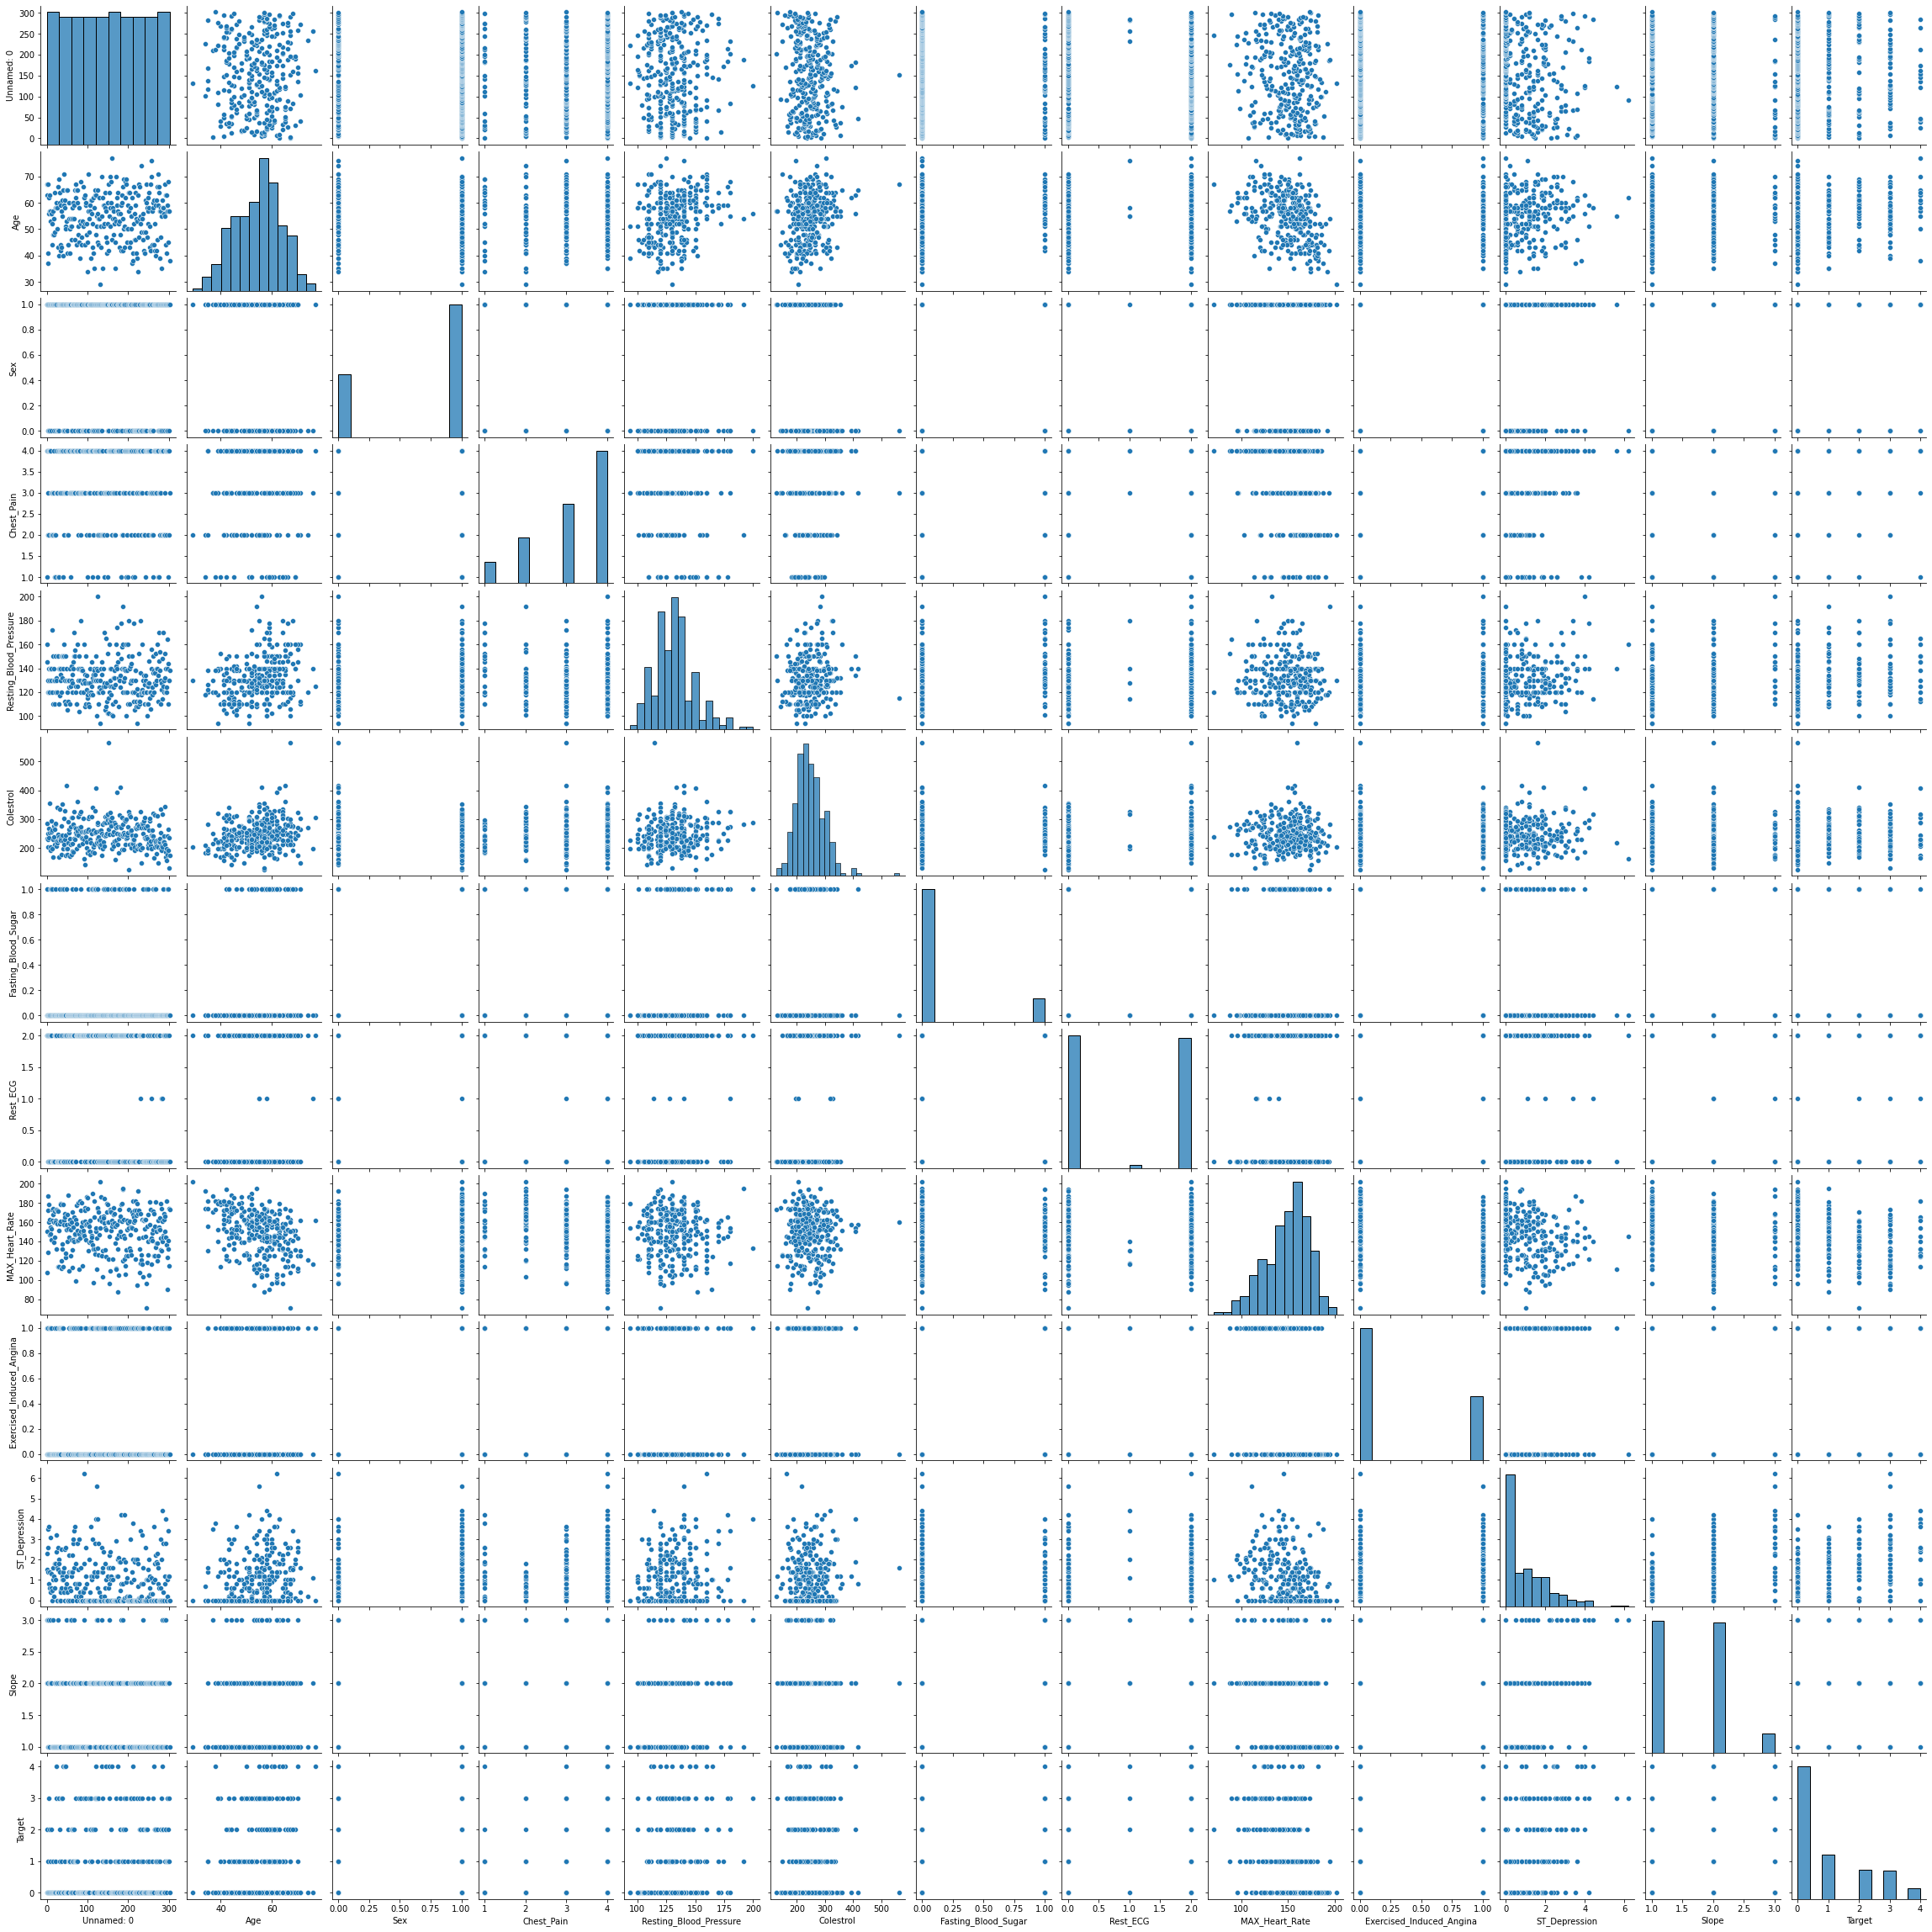

In [5]:
sns.pairplot(dataset)

In [89]:
classifier = GaussianNB()

In [90]:
data.Target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [91]:
data.Target.fillna(0)

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: Target, Length: 303, dtype: int64

In [92]:
split = int(len(data) * .80)
print(split, len(data))
train_data = data.iloc[:split]
test_data = data.iloc[split:]

242 303


In [93]:
classifier.fit(np.array(train_data.MAX_Heart_Rate).reshape(-1,1), train_data.Target)

GaussianNB()

In [94]:
preds = classifier.predict(np.array(test_data.MAX_Heart_Rate).reshape(-1,1))
print(preds)

[0 0 3 3 0 3 0 0 3 3 3 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0 3 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0]


In [96]:
print('first off...there are {} number of unseeded teams so 0 is popular'.format(len(data[data.Target == 0])))
#now lets loop through the data and compare our predictions with the truth
#this time lets count them
right = 0
wrong = 0
diff = 0
for idx, i in enumerate(preds):
    #idx is the index and i is the predicted seed
    if i == test_data.Target.iloc[idx]:
        print('We got one! Patient #' + str(test_data.index[idx]), i, 'Heart Disease Successfully Detected')
        right += 1
    else:
        print('Missed: predicted', i, 'truth:', test_data.Target.iloc[idx],  'diff:', i-test_data.Target.iloc[idx])
        wrong += 1
        diff += i-test_data.Target.iloc[idx]
print('In total we got {} right and {} wrong.'.format(right, wrong)) # by a total of {} detections'.format(right, wrong, diff))
perc = (right / (right+wrong)) * 100
print(round(perc, 2) , "% accuracy!")

first off...there are 164 number of unseeded teams so 0 is popular
We got one! Patient #242 0 Heart Disease Successfully Detected
Missed: predicted 0 truth: 2 diff: -2
Missed: predicted 3 truth: 0 diff: 3
Missed: predicted 3 truth: 2 diff: 1
Missed: predicted 0 truth: 2 diff: -2
Missed: predicted 3 truth: 1 diff: 2
Missed: predicted 0 truth: 3 diff: -3
We got one! Patient #249 0 Heart Disease Successfully Detected
Missed: predicted 3 truth: 0 diff: 3
Missed: predicted 3 truth: 1 diff: 2
Missed: predicted 3 truth: 0 diff: 3
We got one! Patient #253 0 Heart Disease Successfully Detected
We got one! Patient #254 0 Heart Disease Successfully Detected
We got one! Patient #255 0 Heart Disease Successfully Detected
We got one! Patient #256 0 Heart Disease Successfully Detected
Missed: predicted 3 truth: 0 diff: 3
We got one! Patient #258 0 Heart Disease Successfully Detected
Missed: predicted 0 truth: 1 diff: -1
We got one! Patient #260 0 Heart Disease Successfully Detected
Missed: predicted 

In [97]:
# now lets try this with more features
print(data.columns)
#features = ['W', 'ADJOE', 'WAB'] #zip(data.W[:1600], data.ADJOE[:1600], data.WAB[:1600])
# next try it with all the CONTINUOUS columns by uncommenting the next line
#features = data.columns[2:-3]
print(features)
classifier.fit(train_data[features], train_data.Target)

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target'],
      dtype='object')
Index(['Sex', 'Chest_Pain', 'Resting_Blood_Pressure', 'Colestrol',
       'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope'],
      dtype='object')


GaussianNB()

In [98]:
preds = classifier.predict(test_data[features])
print(preds)

[0 0 0 1 0 3 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 3 2 3 0 0 0 1 1 2 0 0 0 0 0 0
 0 3 0 2 0 0 3 3 0 0 0 0 0 3 3 0 0 3 2 0 3 3 0 0]


In [104]:
#print('first off...there are {} number of unseeded teams so 0 is popular'.format(len(data[data.Target == 0])))
#now lets loop through the data and compare our predictions with the truth
#this time lets count them
right = 0
wrong = 0
diff = 0
for idx, i in enumerate(preds):
    #idx is the index and i is the predicted seed
    if i == test_data.Target.iloc[idx]:
        if i == 0:
            print('We got one! Patient #' + str(test_data.index[idx]), i, 'No Heart Disease Successfully Detected')
            right += 1
        else:
            print('We got one! Patient #' + str(test_data.index[idx]), i, 'Heart Disease Successfully Detected')
            right += 1
        #print('We got one! Patient #' + str(test_data.index[idx]), i, 'Heart Disease Successfully Detected')
        #right += 1
    else:
        print('Missed: predicted', i, 'truth:', test_data.Target.iloc[idx],  'diff:', i-test_data.Target.iloc[idx])
        wrong += 1
        diff += i-test_data.Target.iloc[idx]
print('In total we got {} right and {} wrong.'.format(right, wrong)) # by a total of {} detections'.format(right, wrong, diff))
perc = (right / (right+wrong)) * 100
print(round(perc, 2) , "% accuracy!")

We got one! Patient #242 0 No Heart Disease Successfully Detected
Missed: predicted 0 truth: 2 diff: -2
We got one! Patient #244 0 No Heart Disease Successfully Detected
Missed: predicted 1 truth: 2 diff: -1
Missed: predicted 0 truth: 2 diff: -2
Missed: predicted 3 truth: 1 diff: 2
Missed: predicted 0 truth: 3 diff: -3
We got one! Patient #249 0 No Heart Disease Successfully Detected
Missed: predicted 3 truth: 0 diff: 3
Missed: predicted 3 truth: 1 diff: 2
Missed: predicted 3 truth: 0 diff: 3
We got one! Patient #253 0 No Heart Disease Successfully Detected
We got one! Patient #254 0 No Heart Disease Successfully Detected
We got one! Patient #255 0 No Heart Disease Successfully Detected
We got one! Patient #256 0 No Heart Disease Successfully Detected
We got one! Patient #257 0 No Heart Disease Successfully Detected
We got one! Patient #258 0 No Heart Disease Successfully Detected
Missed: predicted 0 truth: 1 diff: -1
We got one! Patient #260 0 No Heart Disease Successfully Detected
Mi